Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Feature Engineering from Date

In [3]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

In [4]:
df = df.drop('date',axis=1)

In [30]:
# check the Stats of the Data 
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [6]:
df = df.drop('zipcode',axis=1)

splitting data

In [7]:
X = df.drop('price',axis=1)
y = df['price']

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

Scalling data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 ANN Model Building

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [15]:
model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

Training the Model

In [16]:
m = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=128,
              epochs=350)

Epoch 1/500
119/119 [==============================] - 1s 4ms/step - loss: 427711135744.0000 - val_loss: 417522155520.0000
Epoch 2/500
119/119 [==============================] - 0s 3ms/step - loss: 339817889792.0000 - val_loss: 160240287744.0000
Epoch 3/500
119/119 [==============================] - 0s 3ms/step - loss: 110956380160.0000 - val_loss: 99896647680.0000
Epoch 4/500
119/119 [==============================] - 0s 3ms/step - loss: 100135788544.0000 - val_loss: 96045604864.0000
Epoch 5/500
119/119 [==============================] - 0s 3ms/step - loss: 95914319872.0000 - val_loss: 91049508864.0000
Epoch 6/500
119/119 [==============================] - 0s 3ms/step - loss: 90534617088.0000 - val_loss: 86033022976.0000
Epoch 7/500
119/119 [==============================] - 0s 3ms/step - loss: 84671602688.0000 - val_loss: 80442728448.0000
Epoch 8/500
119/119 [==============================] - 0s 3ms/step - loss: 78566146048.0000 - val_loss: 74598572032.0000
Epoch 9/500
119/119 [=====

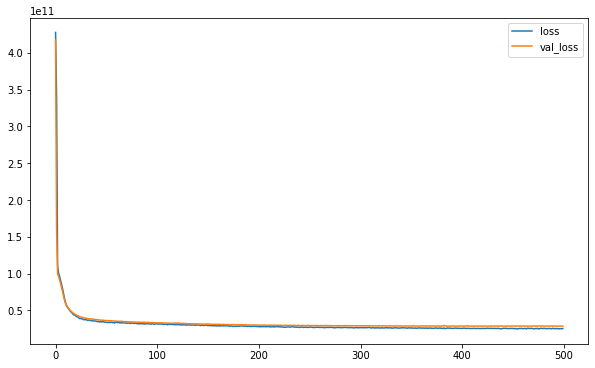

In [18]:
plt.figure(figsize=(10, 6))

plt.plot(m.history['loss'], label='loss')
plt.plot(m.history['val_loss'], label='val_loss')
plt.legend()

In [19]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Evaluation on Test Data

In [20]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

In [21]:
print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:  97682.42043839645
MSE:  23275900313.388443
RMSE:  152564.4136533433
R2 Square:  0.8287830592566714
=========Testing Result=======
MAE:  103049.94089658197
MSE:  28605077464.19344
RMSE:  169130.3564242488
R2 Square:  0.7833744398013225
